# Comenzamos con el procesamiento de imágenes

Este Notebook servirá para probar brevemente la instalación y puesta a punto de scikit-image

Este es el paquete principal que necesitamos. En el podremos encontrar los elementos necesarios para hacer un procesamiento de imágenes tanto básico como avanzado.

In [4]:
# Para procesar las imágenes
from skimage import data

Vamos a ver primero qué tipo de imágenes contiene. Para ello, escribimos *data.* y le damos al tabulador.

In [5]:
coins = data.coins()

In [6]:
coins.shape

(303, 384)

¿Qué contiene *coins*?¿Qué aspecto tiene?

Es una array de tamaño {{coins.shape[0]}} filas x{{coins.shape[1]}} columnas, con valores comprendidos entre 0 y 255. Estos valores son los empleados para representar el negro (0) y el blanco (255).

Vamos a ver ahora cuáles son los 10 primeros elementos por fila y por columna.

In [7]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [8]:
coins[1:10,1:10]

array([[144, 145, 143, 145, 132, 135, 133, 134, 133],
       [147, 143, 147, 145, 132, 136, 133, 134, 132],
       [136, 133, 139, 136, 130, 138, 133, 133, 131],
       [133, 134, 135, 129, 130, 137, 128, 132, 130],
       [133, 137, 132, 127, 133, 135, 126, 131, 130],
       [130, 133, 130, 131, 135, 132, 130, 130, 129],
       [130, 131, 130, 135, 135, 128, 132, 129, 129],
       [134, 136, 133, 129, 129, 129, 128, 131, 129],
       [130, 133, 131, 129, 129, 129, 129, 129, 128]], dtype=uint8)

¿Y qué aspecto tiene esta imagen?¿Cómo podemos visualizarlo?

In [9]:
# Para mostrar las imágenes
import matplotlib.pyplot as plt

In [10]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

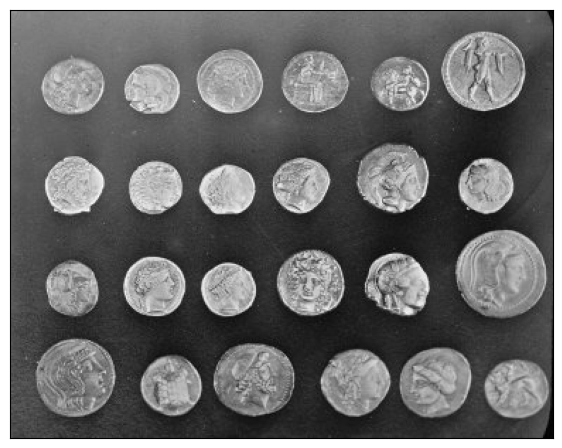

In [11]:
imshow(coins)

¿Y cómo representa python internamente estas imágenes? Vamos a verlo con el comando *type*

In [ ]:
type(coins)

Parece entonces, que si queremos trabajar con imágenes, necesitamos además el paquete *numpy* el cual es uno de los más comunes y empleados en el procesamiento de datos.

In [ ]:
import numpy as np

La razón por la cual lo ejecutamos como *as np* es facilitar la posterior referencia a dicho paquete. De esta manera, y escribiendo *np.* más el tabulador, podremos ver todas las opciones y funciones que este paquete nos ofrece.

In [ ]:
np.

Vamos a calcular ahora el máximo de la matriz. Como hemos visto antes, es una imagen en escala de grises. Luego, si existiera algún pixel muy blanco (representado por un 255), éste será el máximo.

In [ ]:
np.max(coins)

Con lo cual, el máximo de esta imagen es {{np.max(coins)}} que está muy cerca del máximo total (255).

Por otro lado, el mínimo se calcularía de forma similar y tendríamos que dicho mínimo es {{np.min(coins)}}.

¿Y cómo lo haríamos para calcular el máximo por fila y columna? Muy sencillo, para eso, tenemos que hacer uso del parámetro *axis* que indica que la operación de *numpy* concreta que queramos ejecutar se realizará por columnas *axis=0* o por filas *axis=1*.

Vamos a verlo primero con un ejemplo más sencillo, antes de acudir a la imagen.

In [ ]:
# Tomemos un array de 16 elementos y hagamos un array de 4x4
a = np.arange(16).reshape((4,4))

In [ ]:
a

Vamos a calcular el máximo como antes:

In [ ]:
np.max(a)

Ahora vamos a calcular el máximo por columnas, haciendo uso del parámetro *axis=0*. En general, para ver todas las alternativas de parámetros que nos ofrece una función, deberemos de presionar tabulador después de una coma.

In [ ]:
np.max(a,)

In [ ]:
# Máximos por columnas
np.max(a,axis=0)

In [ ]:
# Máximos por filas
np.max(a,axis=1)

Y volviendo a nuestro ejemplo de la imagen, vamos a calcular el máximo por columnas y por filas.

In [ ]:
# Máximos por columnas
max_per_column = np.max(coins,axis=0)

In [ ]:
len(max_per_column)

In [ ]:
max_per_column

In [ ]:
# Máximos por filas
max_per_row = np.max(coins,axis=1)

In [ ]:
# Vamos a representar ahora el máximo por filas
plt.plot(max_per_row)
plt.show()

In [ ]:
# Pintemos la imagen de nuevo, a ver si observamos algo
imshow(coins)

¿No?

Vamos a pintar los máximos por columnas

In [ ]:
# Vamos a representar ahora el máximo por filas
plt.plot(np.max(coins,axis=0))
plt.show()

# Histograma

Lo primero de todo, vamos a pintar el histograma de la imagen anterior

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))
threshold = 125
binary_img = coins > threshold

ax0.hist(coins.ravel(), 512)
ax0.set_title("Histograma de la imagen original")
ax0.axvline(x=threshold, color='r', linestyle='dashed', linewidth=2)
ax1.imshow(binary_img)
ax1.set_title("Imagen umbralizada")
ax1.axis('off')

fig.tight_layout()

# Umbralización

Vamos a binarizar la señal anterior. Es decir, vamos a fijar un umbral y todo lo que sea mayor que ese umbral lo fijaremos a valor 255 (blanco) y lo que esté por debajo, lo fijaremos a valor 0 (negro).

In [ ]:
umbral = 160
binary_max_per_row = 255*(max_per_row>umbral)

In [ ]:
plt.plot(binary_max_per_row)
plt.show()

In [ ]:
# Hacemos una copia de la imagen para hacer nuestras pruebas
test_coins = coins.copy()

In [ ]:
# Todos aquellas posiciones del vector que tengan valores que iguales a 0 los modifico en la imagen poniéndolos
# también a 255.
test_coins[binary_max_per_row==0,:] = 255

In [ ]:
imshow(test_coins)

De esta manera, me quedo con un acotamiento de dónde están las monedas. Este tipo de estrategias sirven para detectar objetos alineados (como puede ser la información dentro de un DNI).

Si repetimos la misma operación para las componentes verticales, veamos qué sucede.

In [ ]:
# Máximos por columnas
max_per_columns = np.max(coins,axis=0)

In [ ]:
# Vamos a representar ahora el máximo por filas
plt.plot(max_per_columns)
plt.show()

Aquí el umbral es más complicado de elegir. En este caso, podemos ver que existen 6 mínimos, correspondientes a las 6 monedas que tenemos por cada fila.

Se puede decir que estos mínimos están, aproximadamente (que es lo que buscamos ahora), en las posiciones: 75, 130, 180, 240, 290.

Por supuesto, estos mínimos se pueden obtener de forma más elegante con un algoritmo de detección de mínimos locales (from scipy.signal import argrelextrema)

In [ ]:
local_minima = np.array([75,130,180,240,290])

In [ ]:
local_minima

In [ ]:
test_coins[:,local_minima] = 255

In [ ]:
imshow(test_coins)

# Espacios de color

Por último, vamos a probar diferentes representaciones de color.

In [ ]:
from skimage.color import rgb2hsv

In [ ]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB")
ax0.axis('off')

ax1.imshow(hsv_img)
ax1.set_title("HSV")
ax1.axis('off')

# Transformaciones afines

Existen infinidad de transformaciones afines. Veamos una de ellas:

In [ ]:
import matplotlib.pyplot as plt

from skimage.transform import swirl


image = data.coffee()
swirled = swirl(image, rotation=0, strength=50, radius=50)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

¿Cuántas transformaciones más hay en `skimage.transform`?

In [ ]:
from skimage.transform import rotate

In [ ]:
imshow(rotate(image, angle=180))

In [ ]:
imshow(image[::-1])